In [2]:
import geopandas as gpd
import glob
import pandas as pd
import rasterio
from rasterio.mask import mask
from nso_ds_classes.nso_ds_normalize_scaler import scaler_class_all
#import arcpy
##from arcpy import env
#from arcpy.sa import *

def extract_dataframe_pixels_values_from_tif_and_polygons(path_to_tif, path_to_polygons):
        geo_file = gpd.read_file(path_to_polygons)
        src = rasterio.open(path_to_tif)
        df = pd.DataFrame([])
        
        print('raster path opened')
        print('convert to RD')
        for index, row in geo_file.iterrows():
                
                # Change the crs to rijks driehoek, because all the satelliet images are in rijks driehoek
                if geo_file.crs != 'epsg:28992':
                        geo_file = geo_file.to_crs(epsg=28992)

                out_image, out_transform = mask(src,row['geometry'], crop=True)
                out_meta = src.profile.copy()

                out_meta.update({
                                "height": out_image.shape[1],
                                "width": out_image.shape[2],
                                "transform": out_transform})
               
                df_row = pd.DataFrame([ band.flatten()  for band in out_image]).transpose()
                df_row.columns = ["r","g","b","i","ndvi","height"]
                df_row['label'] = row["label"]
                df_row['image'] = path_to_tif.split("/")[-1]
                df = df.append(df_row)
        
        src.close()
        df = df[df['r'] !=0].reset_index().drop(['index'],axis=1)
        return df

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [35]:
# Arcpy way of cropping data.
#env.workspace = "E:/data/coepelduynen/"

# Set local variables
#inRaster = "E:/data/coepelduynen/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif"


#for index, row in geo_file.iterrows():
#     print(row["label"])
#      polyPoints =[arcpy.Point(pt[0], pt[1]) for pt in list(row['geometry'].exterior.coords)]

#for index, row in geo_file.iterrows():
    # Execute ExtractByPolygon
#    polyPoints =[arcpy.Point(pt[0], pt[1]) for pt in list(row['geometry'].exterior.coords)]
#    extPolygonOut = ExtractByPolygon(inRaster, polyPoints, "INSIDE")

    # Save the output 
#   extPolygonOut.save("E:/data/20190308_"+row["label"]+"_"+str(index)+"_test_arcgis.tif")

In [3]:
df = pd.DataFrame([])
for file in glob.glob("C:/repos/satellite-images-nso-datascience/score_model/annotations/Annotaties Coepelduynen 20*.gpkg"):
    file = file.replace("\\","/") 
    print(file)
    print(file.split(".")[0].split(" ")[-1])
    print( glob.glob("E:/data/coepelduynen/"+file.split(".")[0].split(" ")[-1]+"*height.tif")[0].replace("\\","/"))
    path_to_polygons = file
    path_to_tif = glob.glob("E:/data/coepelduynen/"+file.split(".")[0].split(" ")[-1]+"*height.tif")[0].replace("\\","/")
    print(path_to_polygons)
    print(path_to_tif)

    df =df.append(extract_dataframe_pixels_values_from_tif_and_polygons(path_to_tif, path_to_polygons))
    df.reset_index().drop(['index'],axis=1)

C:/repos/satellite-images-nso-datascience/score_model/annotations/Annotaties Coepelduynen 20190601.gpkg
20190601
E:/data/coepelduynen/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/score_model/annotations/Annotaties Coepelduynen 20190601.gpkg
E:/data/coepelduynen/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD
C:/repos/satellite-images-nso-datascience/score_model/annotations/Annotaties Coepelduynen 20200915.gpkg
20200915
E:/data/coepelduynen/20200915_112329_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/score_model/annotations/Annotaties Coepelduynen 20200915.gpkg
E:/data/coepelduynen/20200915_112329_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert 

In [4]:
df

,r,g,b,i,ndvi,height,label,image
0,589,612,476,1171,133,101,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
1,592,614,480,1153,132,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
2,591,614,479,1145,131,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
3,592,616,479,1146,131,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
4,598,624,488,1174,132,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
...,...,...,...,...,...,...,...,...
113084,735,855,656,1037,117,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
113085,725,845,654,1045,118,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
113086,734,854,657,1050,117,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
113087,738,859,665,1079,118,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...


In [53]:
path_to_tif =  "E:/data/coepelduynen/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif"
path_to_polygons = "C:/repos/satellite-images-nso-datascience/annotations/2019_03_08_annotaties_coepelduynen_2.gpkg"

In [54]:
df = extract_dataframe_pixels_values_from_tif_and_polygons(path_to_tif, path_to_polygons)

raster path opened
convert to RD


In [22]:
df

,r,g,b,i,ndvi,height,label,image
0,589,612,476,1171,133,101,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
1,592,614,480,1153,132,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
2,591,614,479,1145,131,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
3,592,616,479,1146,131,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
4,598,624,488,1174,132,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
...,...,...,...,...,...,...,...,...
543632,735,855,656,1037,117,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
543633,725,845,654,1045,118,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
543634,734,854,657,1050,117,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...
543635,738,859,665,1079,118,1,wandelpad,20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_K...


In [31]:
df['label'] =df['label'].str.replace("zand","Zand")
df['label'] =df['label'].str.replace('gras(.*)','gras', regex=True)
df['label'] =df['label'].str.replace("struweel","Struweel")
df['label'] =df['label'].str.replace("Boom","Bos")
df['label'] =df['label'].str.replace("bos","Bos")
df['label'] =df['label'].str.replace("vochtig duinvallei","vochtige duinvallei")
df['label'] =df['label'].str.replace("schaduw","Schaduw")

In [32]:
df['date'] = df['image'].str.split("_",1,expand=True)[0]

In [33]:
df.groupby("label").mean()

,r,g,b,i,ndvi,height
label,,,,,,
Bos,377.255803,324.483192,216.873128,706.180395,125.337293,129.168561
Schaduw,383.261905,360.333333,267.904762,230.428571,66.809524,1.000000
Struweel,381.400186,327.143745,219.785331,678.349069,124.479672,57.080417
Zand,666.042405,774.491069,686.832629,917.569471,114.930120,2.104445
asfalt,503.128171,478.632844,352.746328,549.217623,102.017356,15.397864
gras,495.027442,482.839637,364.586299,838.732272,125.007942,1.905854
laag gras,370.921473,341.022834,239.130878,662.109158,126.976803,1.048622
vochtige duinvallei,409.920333,376.849744,262.099628,754.327161,127.993955,0.823195
wandelpad,676.538278,767.093301,598.732057,1057.806220,121.222488,1.117225


In [34]:
df_scaled = df.copy()

In [35]:
# Scale dataframe
for date in df_scaled['date'].unique():
    print(date)
    

    ahn_type = ""

    if int(date[0:4]) <= 2019:
        ahn_type = "./scalers/ahn3.save"
    elif int(date[0:4]) > 2019:
        ahn_type = "./scalers/ahn4.save"

    a_normalize_scaler_class_all = scaler_class_all(scaler_file_band1 = glob.glob("./scalers/"+date.split(" ")[0]+"*band1*")[0].replace("\\","/"), \
                                                    scaler_file_band2 = glob.glob("./scalers/"+date.split(" ")[0]+"*band2*")[0].replace("\\","/"), \
                                                    scaler_file_band3 = glob.glob("./scalers/"+date.split(" ")[0]+"*band3*")[0].replace("\\","/"), \
                                                    scaler_file_band4 = glob.glob("./scalers/"+date.split(" ")[0]+"*band4*")[0].replace("\\","/"), \
                                                    scaler_file_band5 = glob.glob("./scalers/"+date.split(" ")[0]+"*band5*")[0].replace("\\","/"), \
                                                    scaler_file_band6 = ahn_type)
    
    df_scaled[df_scaled['date'] == date] = a_normalize_scaler_class_all.transform(df_scaled[df_scaled['date'] == date], col_names=["r","g","b","i",'ndvi','height'])

20190601


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20200915


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20210907


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20220515


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

In [36]:
df_scaled.groupby("label").mean()

,r,g,b,i,ndvi,height
label,,,,,,
Bos,0.150467,0.165101,0.171217,0.210166,0.817972,0.506543
Schaduw,0.203863,0.225165,0.228447,0.078087,0.430402,0.003922
Struweel,0.161332,0.175105,0.180952,0.216139,0.819554,0.223845
Zand,0.514115,0.550042,0.544655,0.289340,0.737552,0.008253
asfalt,0.281885,0.274686,0.258265,0.152572,0.658509,0.060384
gras,0.268972,0.251735,0.235251,0.214282,0.796299,0.007474
laag gras,0.174210,0.215986,0.215503,0.242084,0.835863,0.004112
vochtige duinvallei,0.155285,0.186607,0.190509,0.217865,0.834610,0.003228
wandelpad,0.581800,0.558395,0.484930,0.329348,0.773933,0.004381


# Make a model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['r','g','b','i','ndvi','height']].values, df_scaled['label'].values,test_size=0.4)

In [49]:
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [41]:
model.score(X_test,y_test )

0.9867926697477639

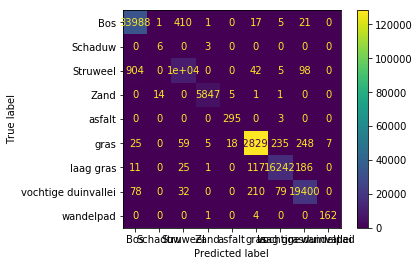

In [45]:
confusion_matrix = metrics.confusion_matrix(model.predict(X_test), y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)

cm_display.plot()
plt.show()

In [51]:
print(metrics.classification_report(y_test,model.predict(X_test)))

                     precision    recall  f1-score   support

                Bos       0.99      0.97      0.98     35006
            Schaduw       0.67      0.29      0.40        21
           Struweel       0.91      0.95      0.93     10872
               Zand       1.00      1.00      1.00      5858
             asfalt       0.99      0.92      0.96       318
               gras       1.00      1.00      1.00    128688
          laag gras       0.98      0.98      0.98     16570
vochtige duinvallei       0.98      0.97      0.98     19953
          wandelpad       0.97      0.96      0.96       169

           accuracy                           0.99    217455
          macro avg       0.94      0.89      0.91    217455
       weighted avg       0.99      0.99      0.99    217455



In [48]:
model = RandomForestClassifier(criterion="entropy", max_features=3)
print(cross_val_score(model,df_scaled[['r','g','b','i','ndvi','height']].values,df_scaled['label'].values, cv=4))
model = model.fit(X_train,y_train)

KeyboardInterrupt: 

# Check contrast model.

In [38]:
from nso_ds_classes.nso_ds_models import cluster_scaler_BNDVIH_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
confusion_matrix = metrics.confusion_matrix(df_scaled[df_scaled['label'] != "Pad"]['label'].values, df_scaled[df_scaled['label'] != "Pad"]['predict'].values)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=df_scaled[df_scaled['label'] != "Pad"]['predict'].unique())

cm_display.plot()
plt.show()

In [40]:
cluster_centers_file = "./cluster_centers/normalized_5_BHNDVI_cluster_centers_dunes.csv"

In [41]:
a_cluster_annotations_stats_model = cluster_scaler_BNDVIH_model(cluster_centers_file)

In [42]:
a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([df[['r','g','b','i','ndvi','height']].values[0]]))

'Bos'

In [43]:
df_scaled['predict'] = df_scaled.apply(lambda x: a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([x[['r','g','b','i','ndvi','height']]])), axis=1)

In [49]:
df_scaled[df_scaled['label'] == "Zand"]

,r,g,b,i,ndvi,height,label,image,date,predict
395062,0.531486,0.604323,0.616110,0.370973,0.798701,0.176471,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Hoog gras
395063,0.516373,0.587406,0.599829,0.349844,0.785714,0.192157,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Struweel
395064,0.511335,0.581767,0.596401,0.345341,0.785714,0.192157,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Struweel
395065,0.523929,0.595865,0.613539,0.360928,0.792208,0.011765,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
395066,0.521411,0.590226,0.597258,0.360928,0.792208,0.011765,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
...,...,...,...,...,...,...,...,...,...,...
408660,0.355164,0.416353,0.443016,0.268445,0.772727,0.003922,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
408661,0.342569,0.398496,0.421594,0.244891,0.753247,0.003922,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
408662,0.341310,0.397556,0.420737,0.241773,0.746753,0.003922,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
408663,0.346348,0.403195,0.427592,0.247662,0.753247,0.003922,Zand,20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_K...,20210907,Laag gras
